In [55]:
# combine the datasets, which have different current dates, together

import csv

df_25 = pd.read_csv('Data\\LogisticRegression_Data_25.csv')
labels = list(df_25.columns)
df_25 = np.array(df_25)
df_30 = pd.read_csv('Data\\LogisticRegression_Data_30.csv')
df_30 = np.array(df_30)
df_35 = pd.read_csv('Data\\LogisticRegression_Data_35.csv')
df_35 = np.array(df_35)
df_40 = pd.read_csv('Data\\LogisticRegression_Data_40.csv')
df_40 = np.array(df_40)

# name of csv file
filename = "Data\\LogisticRegression_Data.csv"

# writing to csv file
with open(filename, 'w') as csvfile: 
    # creating a csv writer object
    csvwriter = csv.writer(csvfile,lineterminator='\n')

    # writing the fields 
    csvwriter.writerow(labels) 

    csvwriter.writerows(df_25)
    csvwriter.writerows(df_30)
    csvwriter.writerows(df_35)
    csvwriter.writerows(df_40)

In [56]:
# use multivariate logistic regression is for classification problems

import pandas as pd # Pandas is used for data manipulation
import numpy as np # Use numpy to convert to arrays
from sklearn.model_selection import train_test_split # Using Skicit-learn to split data into training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz # Import tools needed for visualization
import pydot
import matplotlib.pyplot as plt # Import matplotlib for plotting and use magic command for Jupyter Notebooks
from matplotlib import style
from datetime import datetime
import csv
from sklearn import metrics # Model Evaluation
import seaborn as sb # Import Seaborn for statistical visualizations

df = pd.read_csv('Data\\LogisticRegression_Data.csv')

df = df.drop('PART', axis = 1) # Remove the part number
df = df.drop('Vendor', axis = 1) # Remove the vendor
df = df.drop('PL Name', axis = 1) # Remove the product line
df = df.drop('LIFECYCLE_STATUS', axis = 1) # Remove the lifecycle status
df = df.drop('OBSOLESCENCE_LTB_DAT', axis = 1) # Remove the obsolescence date in short date format
df = df.drop('INTRODUCTION_DATE', axis = 1) # Remove the introduction date in short date format

# eliminate the rows where the obsolete date is later than the intro date
labels = list(df.columns)

row_index = 0

while row_index < len(df):
    intro_index = labels.index("INTRO_DATE (YRS SINCE 1980)")
    obsolete_index = labels.index("OBSOL_DATE (YRS SINCE 1980)")
    if df.iloc[row_index,intro_index] > df.iloc[row_index,obsolete_index]: # if the introduction date is later than the obsolescence date
        df = df.drop(df.index[row_index],axis=0)
    else:
        row_index += 1

df = df.drop('OBSOL_DATE (YRS SINCE 1980)', axis = 1) # Remove the obsolescence date in short date format

labels = list(df.columns)

x_var = df[['INTRO_DATE (YRS SINCE 1980)','AVGPROCLIFE','CURRENT_DATE (YRS SINCE 1980)']]
y_var = df['OBSOLETE'] # dependent variable

lr = LogisticRegression() # create model

x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.3, random_state = 42)

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

# Use score method to get accuracy of model on test data
score = lr.score(x_test, y_test) # Accuracy is defined as correct predictions / total number of data points
print("Model Accuracy: " + str(score))

labels.remove('OBSOLETE')
labels.remove('EXISTING_PREDICTION (YRS SINCE 1980)')
labels.append("PREDICTION")
labels.append("GROUND TRUTH")

x_test = np.array(x_test).tolist()
predictions = np.array(predictions).tolist()
y_test = np.array(y_test).tolist()

Model Accuracy: 0.7942206654991243


[[554 113]
 [122 353]]


Text(0.5, 15.0, 'Predicted label')

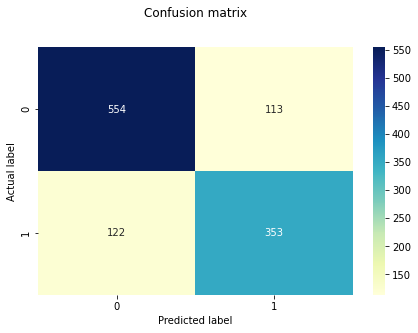

In [57]:
# confusion matrix to evaluate the model
cnf_matrix = metrics.confusion_matrix(y_test,predictions)
print(cnf_matrix)

class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
for row_index in range(0,len(x_test)): # for each row, append the data value
    x_test[row_index].append(predictions[row_index])
    x_test[row_index].append(y_test[row_index])

# name of csv file
filename = "Data\\Y2EOL_Predictions_LOR.csv"

# writing to csv file
with open(filename, 'w') as csvfile: 
    # creating a csv writer object
    csvwriter = csv.writer(csvfile,lineterminator='\n')

    # writing the fields 
    csvwriter.writerow(labels) 

    # writing the data rows 
    csvwriter.writerows(x_test)